In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from statannot import add_stat_annotation

In [3]:
# plotting parameters
grey = "#21201F"
green = "#9AC529"
lblue = "#42B9B2"
pink = "#DE237B"
orange = "#F38A31"

nt_colors = [green, lblue, pink, orange]

plt.style.use("ggplot")
fig_width = 12  # width in inches
fig_height = 9  # height in inches
fig_size = [fig_width, fig_height]
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["figure.autolayout"] = True

sns.set(
    style="white",
    context="notebook",
    font_scale=1,
    rc={
        "axes.labelcolor": grey,
        "text.color": grey,
        "axes.edgecolor": grey,
        "xtick.color": grey,
        "ytick.color": grey,
    },
)

sns.set_palette(sns.color_palette(nt_colors))

In [4]:
epoch_type = 'evoked'
# epoch_type = 'pseudo-rs'

all_participants = ['VP07','VP08','VP09', 'VP10','VP11','VP12','VP13','VP14','VP18','VP19','VP20','VP22','VP23','VP24','VP25','VP26','VP27','VP28','VP29','VP30','VP31','VP32','VP33','VP35','VP36','VP37']
# participant = all_participants[1]

path = '/media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/' #icm-linux
# path = '/Users/nicobruno/ownCloud/MW_eeg_data/minmarker/' #nico-mac


In [5]:
df = pd.DataFrame()

for i,v in enumerate(all_participants): 
    participant = v
    
    folder = path + participant +'/'
    
    df_ = pd.read_csv(folder+ participant + '_' + epoch_type + '_all_marker.csv', index_col = 0)
    df_['participant'] = i
    df = df.append(df_)
    
# df.to_csv('Data/all_markers.csv')

In [6]:
markers = ['wSMI_1', 'wSMI_2', 'wSMI_4', 'wSMI_8', 'p_e_1', 'p_e_2',
       'p_e_4', 'p_e_8', 'k', 'b', 'b_n', 'g', 'g_n', 't', 't_n',
       'd', 'd_n', 'a_n', 'a', 'CNV', 'P1', 'P3a', 'P3b']
erps =['CNV', 'P1', 'P3a', 'P3b']


df_subtracted = df.query("preproc == 'subtracted'").drop(columns = erps+['preproc'])
df_erp = df.query("preproc == 'erp'").drop(columns = np.setdiff1d(markers,erps).tolist()+['preproc'])

df_markers = df_subtracted.merge(df_erp, 'inner', on =np.setdiff1d(df_subtracted.columns, markers).tolist() )

df_markers = (df_markers
              .query("stimuli == 'go'")
              .query("correct == 'correct'")
            .query('prev_trial <= 4')
              .drop(['stimuli', 'correct', 'prev_trial', 'label', 'events',  'epoch_type'], axis = 1)
              .query("mind in ['on-task','dMW', 'sMW']")
              .groupby(['segment', 'participant']).filter(lambda x: len(x) > 1)
             )


In [7]:
df_markers.groupby(['probe', 'participant']).count()

wSMI_1  wSMI_2  wSMI_4  wSMI_8  p_e_1  p_e_2  p_e_4  p_e_8  \
probe participant                                                               
PC    0                25      25      25      25     25     25     25     25   
      1                21      21      21      21     21     21     21     21   
      2                31      31      31      31     31     31     31     31   
      3                43      43      43      43     43     43     43     43   
      4                41      41      41      41     41     41     41     41   
      5                11      11      11      11     11     11     11     11   
      6                16      16      16      16     16     16     16     16   
      7                 7       7       7       7      7      7      7      7   
      8                19      19      19      19     19     19     19     19   
      9                21      21      21      21     21     21     21     21   
      10                7       7       7       7      7      7      7      7   
      11               31      31      31      31     31     31     31     31   
      12                6       6       6       6      6      6      6      6   
      13               36      36      36      36     36     36     36     36   
      14               18      18      18      18     18     18     18     18   
      15               28      28      28      28     28     28     28     28   
      16               35      35      35      35     35     35     35     35   
      17               32      32      32      32     32     32     32     32   
      18                2       2       2       2      2      2      2      2   
      20               13      13      13      13     13     13     13     13   
      21               14      14      14      14     14     14     14     14   
      23               36      36      36      36     36     36     36     36   
      24               44      44      44      44     44     44     44     44   
      25               16      16      16      16     16     16     16     16   
SC    0                 4       4       4       4      4      4      4      4   
      1                50      50      50      50     50     50     50     50   
      2                88      88      88      88     88     88     88     88   
      5                 6       6       6       6      6      6      6      6   
      6               158     158     158     158    158    158    158    158   
      7               134     134     134     134    134    134    134    134   
      8                52      52      52      52     52     52     52     52   
      9                57      57      57      57     57     57     57     57   
      10               16      16      16      16     16     16     16     16   
      12               77      77      77      77     77     77     77     77   
      13               54      54      54      54     54     54     54     54   
      14               49      49      49      49     49     49     49     49   
      15              137     137     137     137    137    137    137    137   
      17                4       4       4       4      4      4      4      4   
      18               72      72      72      72     72     72     72     72   
      19              253     253     253     253    253    253    253    253   
      20               32      32      32      32     32     32     32     32   
      21              177     177     177     177    177    177    177    177   
      22               75      75      75      75     75     75     75     75   
      23               27      27      27      27     27     27     27     27   
      24               12      12      12      12     12     12     12     12   
      25               68      68      68      68     68     68     68     68   

                     k    b  ...    d  d_n  a_n    a  mind  segment  CNV   P1  \
probe participant            ...                 

In [8]:
df_agg = df_markers.groupby(['probe', 'mind', 'participant'], as_index = False).agg('mean')
df_melt = df_agg.melt(id_vars = ['probe', 'mind', 'participant'], var_name = 'markers', value_name = 'val')

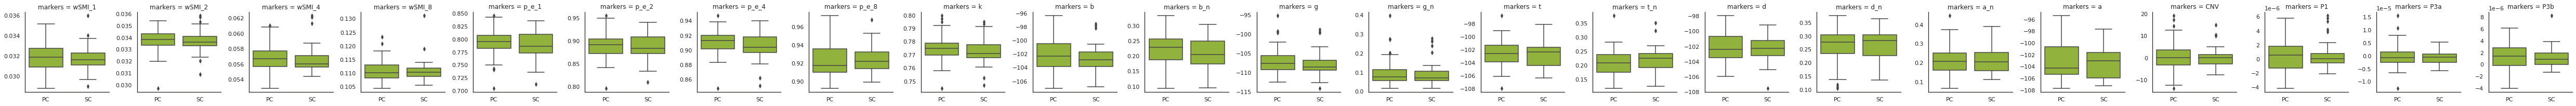

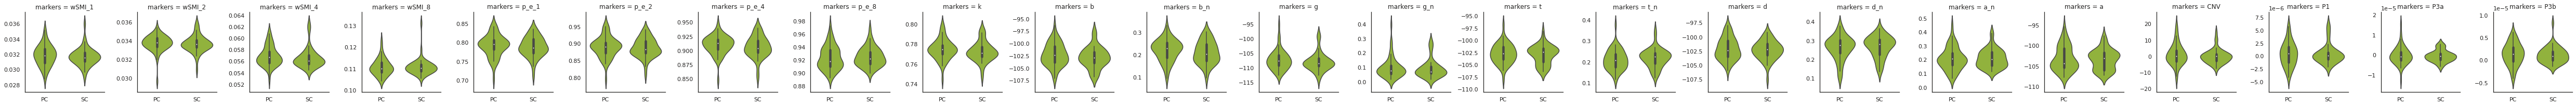

In [9]:
g = sns.FacetGrid(df_melt, col='markers', sharey = False)
g.map_dataframe(sns.boxplot, x='probe', y = 'val')
plt.show()

g = sns.FacetGrid(df_melt, col='markers', sharey = False)
ax = g.map_dataframe(sns.violinplot, x='probe', y = 'val')
plt.show()

## On-task Vs Mind- Wandering
This can only be performed for PC probes  as they are the only ones with On-task reports.

In [10]:
agg_dict = {k:['mean', 'std'] for k in markers }
agg_dict.update({k:'first' for k in df_markers.drop(markers, axis=1).columns})

df_mind = (
    df_markers
    .query("probe == 'PC'")
    .groupby(['segment', 'participant'], as_index = False).agg(agg_dict)
#     .query("mind != 'sMW'") #if you want to test against just one of the mw
    .assign(
    mind2 = lambda df: np.where(df.mind == 'on-task', 'on-task', 'mw'))
)

df_mind.columns = df_mind.columns.map("_".join)

df_mind  = (df_mind
            .rename(columns = {'participant_first':'participant', 'probe_first':'probe', 'mind_first':'mind', 'segment_first':'segment', 'mind2_':'mind2'})
            .drop(['participant', 'probe', 'mind', 'segment'], axis = 1) 
           )

In [11]:
len(df_mind.columns)
len(df_mind)

176

In [12]:
# df_mind.drop('mind2', axis =1 ).corr()

<AxesSubplot:>

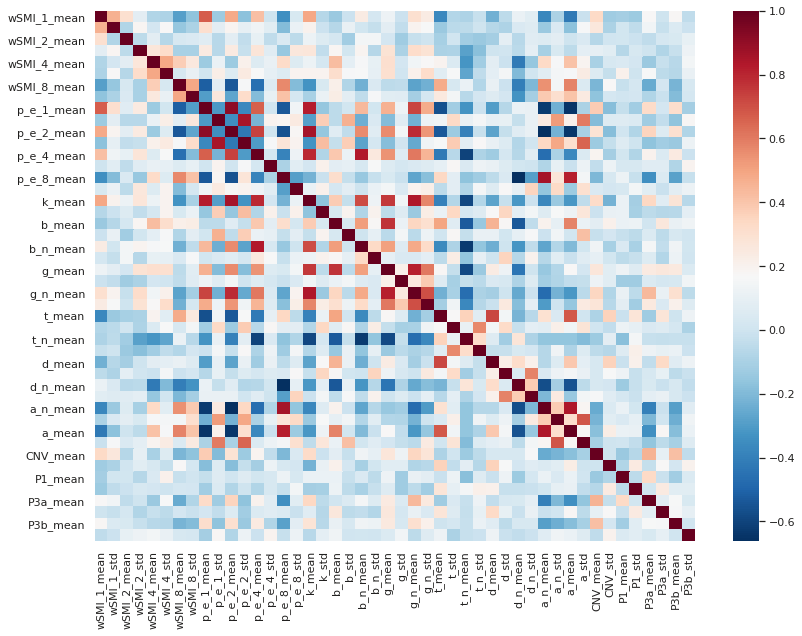

In [13]:
sns.heatmap(df_mind.drop('mind2', axis =1 ).corr(),cmap='RdBu_r' )

## dMW Vs sMW
This will be only performed in SC as they have more trials

In [14]:
agg_dict = {k:['mean'] for k in markers }
agg_dict.update({k:'first' for k in df_markers.drop(markers, axis=1).columns})

df_mw = (
    df_markers
    .query("probe == 'SC'")
    .query("mind != 'on-task'")
    .groupby(['segment', 'participant'], as_index = False).agg(agg_dict)
)

df_mw.columns = df_mw.columns.map("_".join)

df_mw  = (df_mw
            .rename(columns = {'participant_first':'participant', 'probe_first':'probe', 'mind_first':'mind', 'segment_first':'segment'})
            .drop(['participant', 'probe', 'segment'], axis = 1) 
           )

In [15]:
# df_mw.drop('mind', axis =1 ).corr()

<AxesSubplot:>

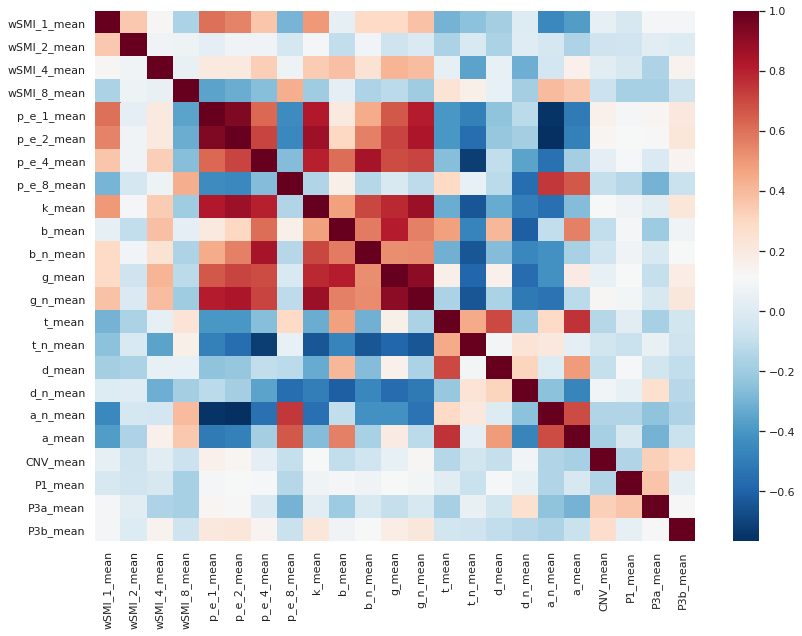

In [16]:
sns.heatmap(df_mw.drop('mind', axis =1 ).corr(),cmap='RdBu_r' )

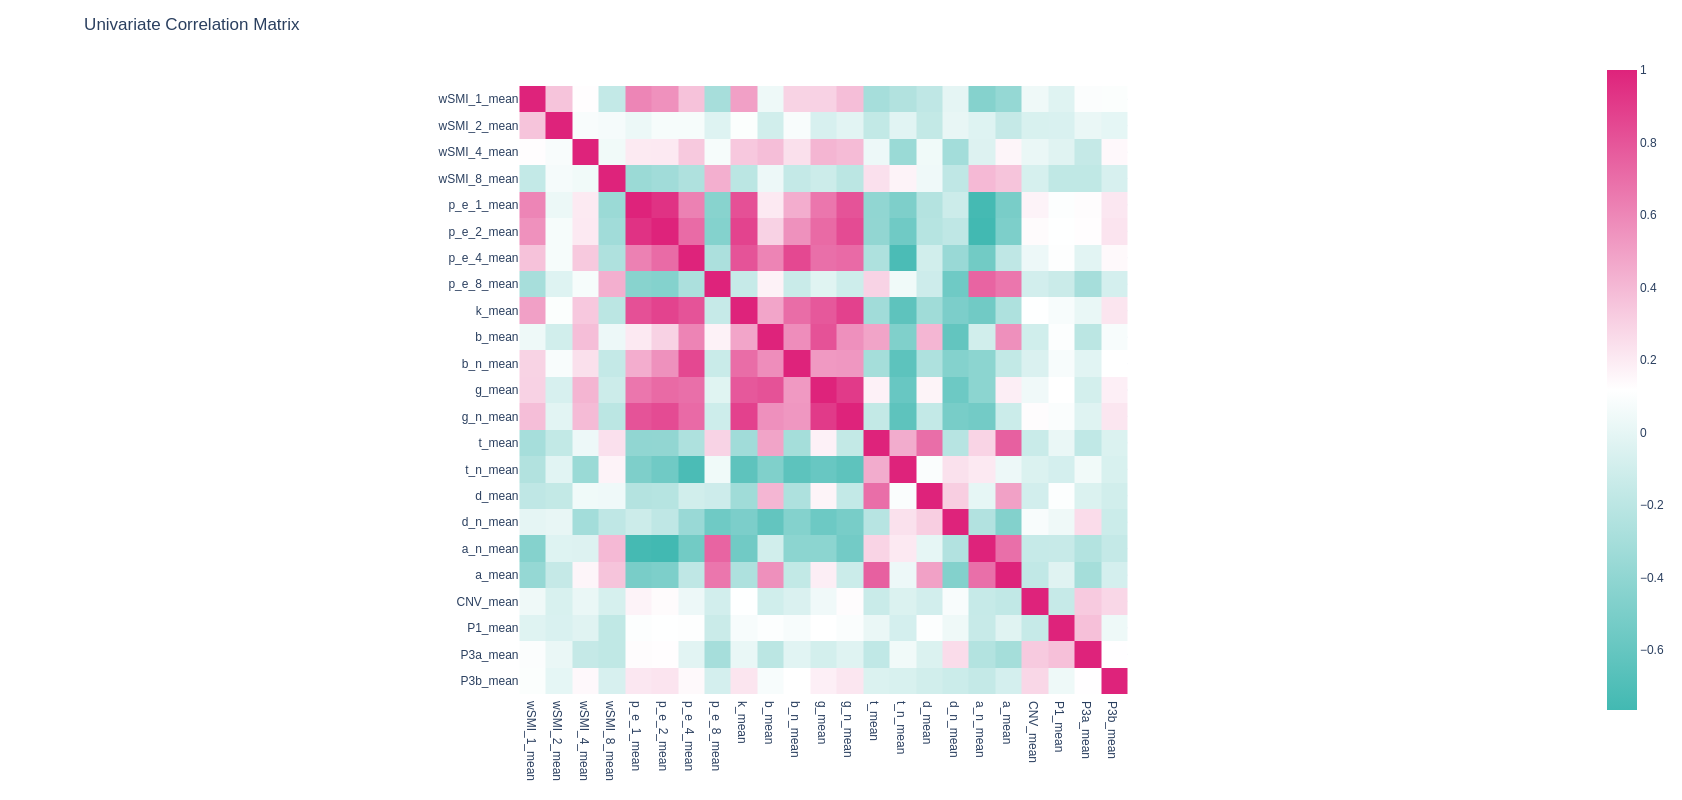

In [36]:
fig = px.imshow(df_mw.drop('mind', axis =1 ).corr(),  color_continuous_scale=[(0,lblue), (0.5,'white'), (1,pink)] ,template = "plotly_white")

fig.update_layout(
    title= 'Univariate Correlation Matrix',
    autosize=False,
    width=800,
    height=800,
    yaxis = {
            'showticklabels': True,
            'tickmode': 'linear',
        }
)
fig.show()